<a href="https://colab.research.google.com/github/monu322/CustomerClassification/blob/main/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#load csv data
df = pd.read_csv('https://raw.githubusercontent.com/monu322/CustomerClassification/main/CE802_P3_Data.csv')

df.head(20)



,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00
5,12.34,3.84,-18.00,Low,Europe,0.87,-74.46,66.70,-18.46,4,15.51,8,-515.55,11.21,10234.20,-290.43,91.90
6,-9.90,10.20,-11.76,Medium,UK,8.61,-200.20,62.70,-1.10,10,5.91,10,-28.41,14.12,11102.06,-816.04,0.00
7,-13.62,5.40,-16.77,Medium,Rest,4.38,-201.54,91.12,-13.30,6,5.34,6,1621.71,15.96,14760.40,-1029.52,273.70
8,16.69,3.76,0.69,Very high,USA,60.18,-185.88,106.31,-12.10,4,14.34,14,204.66,14.28,16432.34,-713.77,2420.98
9,-45.45,4.94,-11.49,Very high,UK,0.00,-217.62,88.40,-17.44,4,24.96,12,278.25,8.75,19807.30,-176.51,2308.05


In [59]:
#converting F5 text data to category type and encoding them to number codes
df['F5'] = df['F5'].astype('category')
df['F5'] = df['F5'].cat.codes

#replacing textual ordinal values to ordinal numbers
replace_map = {'F4': {'High':3, 'Medium':2, 'Low':1, 'Very high':4, 'Very low':0}}
df.replace(replace_map, inplace=True)

#delete all records where Target is zero
df = df.drop(df[df.Target == 0].index)

df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,3,2,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,2,2,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,1,1,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
5,12.34,3.84,-18.00,1,0,0.87,-74.46,66.70,-18.46,4,15.51,8,-515.55,11.21,10234.20,-290.43,91.90
7,-13.62,5.40,-16.77,2,1,4.38,-201.54,91.12,-13.30,6,5.34,6,1621.71,15.96,14760.40,-1029.52,273.70
8,16.69,3.76,0.69,4,3,60.18,-185.88,106.31,-12.10,4,14.34,14,204.66,14.28,16432.34,-713.77,2420.98
9,-45.45,4.94,-11.49,4,2,0.00,-217.62,88.40,-17.44,4,24.96,12,278.25,8.75,19807.30,-176.51,2308.05
10,-1.72,11.26,0.78,1,0,5.01,-209.48,79.31,-7.66,6,9.93,6,-253.77,13.26,15927.15,-665.91,80.87
11,-50.99,12.32,8.49,1,2,73.05,102.14,47.42,-20.26,10,10.98,10,382.71,21.75,6796.03,-537.06,94.92
12,-10.35,9.66,-2.10,0,1,3.63,-152.58,104.32,-17.06,6,9.72,8,55.44,19.00,15172.27,-374.68,1290.43


Feature: 0, Score: 0.58005
Feature: 1, Score: 77.33392
Feature: 2, Score: 0.59859
Feature: 3, Score: 208.85675
Feature: 4, Score: 176.72470
Feature: 5, Score: -0.00109
Feature: 6, Score: -0.21463
Feature: 7, Score: 18.96867
Feature: 8, Score: 3.75216
Feature: 9, Score: -94.06748
Feature: 10, Score: 51.73850
Feature: 11, Score: 74.63410
Feature: 12, Score: 0.45466
Feature: 13, Score: -1.05902
Feature: 14, Score: 0.00477
Feature: 15, Score: 1.10653


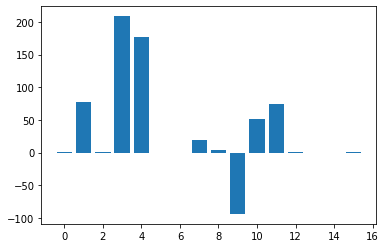

In [60]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X = df.drop(['Target'], axis=1)
y = df.Target

lr = LinearRegression()
lr.fit(X, y)

importance = lr.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


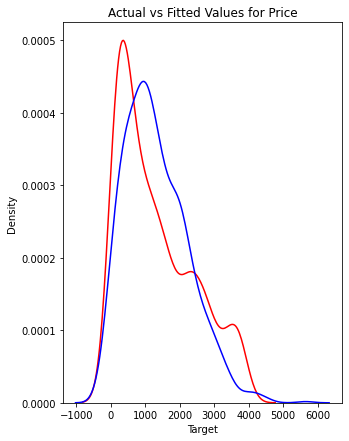

R2 Score of the Linear Regressor:  0.7086722908448713


In [61]:
import seaborn as sns
plt.figure(figsize=(5, 7))

y_pred = lr.predict(X)

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

print('R2 Score of the Linear Regressor: ', lr.score(X,y))

In [62]:
#using Random forest for predicting sales
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X, y)

y_pred = regressor.predict(X)


rdf=pd.DataFrame({'Actual':y, 'Predicted':y_pred, 'Percentage error': 100*(abs(y-y_pred)/np.maximum.reduce([y_pred,y]))})
rdf.head(50)



,Actual,Predicted,Percentage error
0,1051.99,1166.88358,9.846190
1,816.64,819.94022,0.402495
2,3241.77,2873.26033,11.367545
5,91.90,169.64343,45.827551
7,273.70,431.64597,36.591554
8,2420.98,1892.30393,21.837275
9,2308.05,2135.40698,7.480038
10,80.87,139.61096,42.074748
11,94.92,417.52698,77.266140
12,1290.43,1247.50515,3.326399


In [63]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 183.88278841405526
Mean Squared Error: 56135.89795926908
Root Mean Squared Error: 236.93015417896703


In [64]:
# Calculate the absolute errors
errors = abs(y_pred-y)
max_vals = np.maximum.reduce([y_pred,y])

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 79.4 %.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


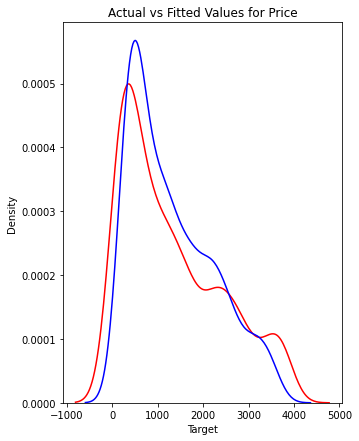

In [65]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [66]:
#using KNN for predicting sales

df1 = df

from sklearn.model_selection import train_test_split
train , test = train_test_split(df1, test_size = 0.3)

x_train = train.drop('Target', axis=1)
y_train = train['Target']

x_test = test.drop('Target', axis = 1)
y_test = test['Target']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#standardize the data before using KNN
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_scaled, y_train)  #fit the model
    y_pred=model.predict(x_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 1032.9803581880033
RMSE value for k=  2 is: 875.7838876727972
RMSE value for k=  3 is: 814.4700423140001
RMSE value for k=  4 is: 823.9487147811792
RMSE value for k=  5 is: 827.6529285365189
RMSE value for k=  6 is: 815.6605938999226
RMSE value for k=  7 is: 806.9216318066094
RMSE value for k=  8 is: 798.74473257924
RMSE value for k=  9 is: 792.9264011086854
RMSE value for k=  10 is: 800.9399705074915
RMSE value for k=  11 is: 807.0326097748444
RMSE value for k=  12 is: 814.068851846163
RMSE value for k=  13 is: 814.1455009960799
RMSE value for k=  14 is: 821.2765836512687
RMSE value for k=  15 is: 827.8575632916858
RMSE value for k=  16 is: 827.927665269671
RMSE value for k=  17 is: 827.7720316666055
RMSE value for k=  18 is: 832.2516885073121
RMSE value for k=  19 is: 834.2371388702146
RMSE value for k=  20 is: 834.4742000296328


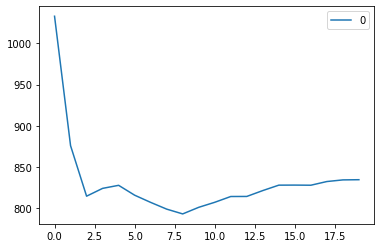

In [67]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [68]:
#select k=5
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 8)

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled) #make prediction on test set

# Calculate the absolute errors
errors = abs(y_pred-y_test)
max_vals = np.maximum.reduce([y_pred,y_test])

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 58.23 %.


In [69]:
# Fit the model over the training data
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'poly')
SVM_regressor.fit(X, y)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred = SVM_regressor.predict(X)


rdf=pd.DataFrame({'Actual':y, 'Predicted':y_pred, 'Percentage error': 100*(abs(y-y_pred)/np.maximum.reduce([y_pred,y]))})
rdf.head(50)

,Actual,Predicted,Percentage error
0,1051.99,1018.455597,3.187711
1,816.64,1018.313803,19.804681
2,3241.77,1023.271269,68.434797
5,91.90,1017.079852,90.964328
7,273.70,1026.422372,73.334564
8,2420.98,1026.727528,57.590417
9,2308.05,1036.349614,55.098476
10,80.87,1024.497275,92.106372
11,94.92,1015.814958,90.655778
12,1290.43,1024.025548,20.644626


In [71]:
# Calculate the absolute errors
errors = abs(y_pred-y)
max_vals = np.maximum.reduce([y_pred,y])

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 47.66 %.


In [75]:
#from the results, Random Forest regressor have performed the best. Now let's use this model to predict sales in test data

#load test data CSV
df = pd.read_csv('https://raw.githubusercontent.com/monu322/CustomerClassification/main/CE802_P3_Test.csv')

dft = df.copy()

df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN
5,-32.10,4.82,3.90,Very low,Rest,0.96,227.24,110.21,-15.96,2,8.13,8,1913.10,18.99,13591.68,-762.02,NaN
6,13.60,3.08,-10.14,Very low,Europe,1.17,-204.00,41.15,-11.50,10,4.02,8,194.76,12.06,13348.05,-954.63,NaN
7,6.45,14.66,-10.20,High,Rest,328.23,-214.30,70.28,-10.64,12,15.48,6,508.05,14.42,18840.04,-307.85,NaN
8,-25.46,2.64,-1.86,High,USA,10.44,-56.68,62.73,-15.22,2,4.59,8,-317.07,16.40,9488.28,-914.32,NaN
9,-33.43,11.04,-24.63,Very low,UK,0.99,-188.08,68.68,-17.52,10,23.43,12,-445.53,18.25,11763.58,-762.03,NaN


In [76]:
#converting F5 text data to category type and encoding them to number codes
df['F5'] = df['F5'].astype('category')
df['F5'] = df['F5'].cat.codes

#replacing textual ordinal values to ordinal numbers
replace_map = {'F4': {'High':3, 'Medium':2, 'Low':1, 'Very high':4, 'Very low':0}}
df.replace(replace_map, inplace=True)

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,4,2,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,0,1,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,0,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,0,2,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,2,3,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [77]:
#dividing data into features
X = df.drop(['Target'], axis=1)

#using the Random forest regressor
RF_regressor=regressor

y_test_pred = RF_regressor.predict(X)

dft['Target'] = y_test_pred



#save the data frame into a csv
dft.to_csv('CE802_P3_Test.csv', index = False)

dft.head(50)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,1484.06961
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,1370.11014
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,377.65966
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1532.65778
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,908.41422
5,-32.10,4.82,3.90,Very low,Rest,0.96,227.24,110.21,-15.96,2,8.13,8,1913.10,18.99,13591.68,-762.02,1507.93541
6,13.60,3.08,-10.14,Very low,Europe,1.17,-204.00,41.15,-11.50,10,4.02,8,194.76,12.06,13348.05,-954.63,124.45378
7,6.45,14.66,-10.20,High,Rest,328.23,-214.30,70.28,-10.64,12,15.48,6,508.05,14.42,18840.04,-307.85,2111.77207
8,-25.46,2.64,-1.86,High,USA,10.44,-56.68,62.73,-15.22,2,4.59,8,-317.07,16.40,9488.28,-914.32,379.59836
9,-33.43,11.04,-24.63,Very low,UK,0.99,-188.08,68.68,-17.52,10,23.43,12,-445.53,18.25,11763.58,-762.03,1184.23360
